## 4.1 Value at Risk

A natural question to ask when making a risky investment is: how bad can things get?

The problem with this question is that there's no limit to the range of possibilities. Whatever terrible situation we can imagine can usually be one-upped by an even more terrible one. At some point we descend into absurdity, speculating perhaps that evil aliens with hopelessly superior technology land on Earth and destroy all human life. While this morbid scenario is not utterly impossible, it's highly unrealistic to the point where there's nothing we could or should do about it. Such extreme speculation is not a guide to actions we should take now.

A more interesting question is: how bad are the things that can realistically happen that we might have a chance of planning for and doing something about? This seems more down-to-earth, but we need to know what "realistically" means.

A measure called _Value at Risk_ (or VaR$^1$) was created to answer the question “how bad can things get _realistically_.” It's now widely used and, in some cases, required by financial regulators to be computed and acted on. 

VaR is simply a percentile of a probability distribution of wealth$^2$. Let $F_t(w)$ be the cumulative distribution function for the wealth of an institution or portfolio at some time $t$ years in the future. ($t$ might be denominated in other time units like days and is often left implicit.) For a probability $0\leq p\leq 1$, we find the amount of wealth $w_p$ so that $F_t(w_p)=1-p$. $w_p$ is called the _$t$-year $p$-Value at Risk_.

For example, if a bank wants to estimate how bad things can get in its trading operations, it would let $w$ be the net value of its trading capital at the end of a day. The 99% one-day VaR for its trading operations would be the level that the end-of-day trading capital was expected to exceed, 99 days out of 100.

The obvious problem with VaR is: what happens on the $100^{th}$ day? Suppose a bank decrees that the 99% one-day VaR of its trading capital has to be no more than a certain low but tolerable amount. The bank checks its various trades and finds that everything is OK. But suppose that someone at the bank is running a strategy where every day, she sells \\$100,000 worth of options that have only a 1-in-200 chance of paying off. If the options don't pay off the bank will keep the \\$100,000, but if they do pay off, the bank will owe \\$1,000,000,000. The 99% VaR does not "see" the 99.5% quantile where the options strategy pays off (i.e. loses); it only "sees" the \\$100,000 profits and deems the trade riskless. But the chance that the bank owes a billion dollars is $1-.995^n$ where $n$ is the number of days the strategy is employed; in about six months, there will be a greater-than-50% chance that the bank will owe a billion dollars.

This is an example of _Goodhart's Law_, named after British economist Charles Goodhart's statement in 1974: "Any statistical relationship will break down when used for policy purposes." Goodhart was talking about Frank Knight's second category of risk &mdash; statistical probability (section 1.1) &mdash; in the context of public policy targets set by the Bank of England, the central bank of the United Kingdom. As soon as economic actors know that there is a target, they will alter their behavior so that (for example) events that only happened 1% of the time in the past now happen more often.

Goodhart's Law was extended by [J&oacute;n Dan&iacute;elsson](https://doi.org/10.1016/S0378-4266(02)00263-7) to say "A risk model breaks down when used for its intended purpose." Dan&iacute;elsson pointed out that some people assume in error that
>...the role of the risk forecaster is akin to a meteorologists job, who can forecast the weather, but not influence it. [But] if risk measurements influence people's behavior, it is inappropriate to assume market prices follow an independent stochastic process.

Our example bank tried to define "how bad can things get _realistically_" to exclude far-fetched scenarios like alien invasions by drawing a line at 99% VaR. But as soon as that line was drawn, people were encouraged to do things just on the other side of that line. We will see that there are better measures than VaR, but any measure is subject to gaming. Further, if more market participants engage in strategies that are just on the other side of the line, their aggregate behavior changes the probabilities so their strategies might no longer be just on the other side of the line.

That does not mean that metrics should be abandoned: risk management should be made as rigorous as possible, but no more rigorous. If metrical rigor is getting in the way of common sense, metrical rigor needs to step aside.

The more formal definition of Value at Risk (VaR) is:
$$VaR(p)=\inf\{x\mid Pr(-X>x)\leq 1-p\}\tag{4.1}$$

$X$ is the random variable of interest. Let’s assume $X$ is in P&L terms, so $–X$ is the distribution of (positive) losses from $X$. The definition (say for $p=99\%$) says we look for the smallest loss $x$ that is exceeded 1% of the time. If $X$ has a continuous cumulative distribution function $F$, then we can write
$$VaR(p)=-F^{-1}(1-p);\hspace{2em}VaR(p)=x \iff \int_{-\infty}^{-x}dF(y)=1-p\tag{4.2}$$
_Expected Shortfall_ is an average of the “bad” VaRs:
$$ES(p)=\frac{1}{1-p}\int_p^1{VaR(z)dz}\tag{4.3}$$

If there is a continuous cdf $F$, then we can define _cVaR, or conditional Value at Risk_, as the expected value given that you are in the VaR tail:
$$cVaR(p)=\frac{-1}{1-p}\int_{-\infty}^{-VaR(p)}{ydF(y)}\tag{4.4}$$
Note that when there is a continuous cdf $F$, the change of variable $1-z=F(y)$ in the definition of $ES(p)$ makes it equivalent to $cVaR(p)$.

The $\frac{1}{1-p}$ factor on the right of (4.3) and (4.4) normalizes the probability density functions so they integrate to one in the tail. For ES, the pdf is uniform, while for cVaR the pdf is the pdf of the random variable X.

Discrete distributions can sometimes cause problems. Consider for example the toss of a weighted coin that loses \\$100, 2% of the time, and gains \\$1 the other 98% of the time. The pdf $f$ is a mass function; $f(-100)=.02$; $f(1)=.98$. From (4.1) we see that $VaR(p)=100$ for $p\geq 98\%$; $VaR(p)=1$ for $p<98\%$.

We now calculate 99% ES and 99% cVaR for this distribution.
- For the ES calculation, the $VaR(z)$ in the integral is a constant: 100. $So ES(99\%)=VaR(99\%)=100$.
- For the cVaR calculation, the integral in (4.4) ranges from $-\infty$ to $-VaR(99\%)=-100$. The $dF(y)$ term equals $f(y)dy$ where $f$ is the probability mass function, which in this range is only nonzero at $y=-100$ where it equals .02. So the $cVaR(99\%)=200$.

So ES and cVaR don't agree here. Usually some kind of interpolation or extrapolation can be applied between probability mass points to fix things up, assuming that such manipulation does not irrevocably depart from the underlying process.

<br><br>
<font size=1>
$^1$ The abbreviation VaR is case-sensitive: usually "Var" means statistical variance (the square of standard deviation), while "VaR" means value at risk.
<br>$^2$ VaR might also be in P&L (profit&loss, i.e. change in wealth) or percentage terms.</font>

## 4.2 Coherent Risk

In the late 1990s, four co-authors [Artzner, Delbaen, Eber and Heath ("ADEH")](https://people.math.ethz.ch/~delbaen/ftp/preprints/CoherentMF.pdf) postulated a series of mathematical axioms that, they claimed, any reasonable ("coherent") measure of financial risk should have. They were trying to avoid damaging situations like the example of the trading desk selling options. We have of course already seen a reasonable axiomatic system – VNM utility theory – that is mathematically powerful, but doesn’t really capture the range of human economic responses. ADEH is another one – the axioms are reasonable but humans aren’t. But it can still help to avoid some damaging situations.

ADEH's definition of risk is more accounting-oriented than the essentially probabilistic Knight definitions. For ADEH, risk is how much cash has to be put into a portfolio to make it acceptable. An "acceptable" portfolio is one that passes regulatory or other hurdles. So to ADEH, risk is a peril &mdash; the chance of having an unacceptable portfolio &mdash; and  the metric for risk is how much capital you have to set aside in order to mitigate the peril.

For example if your portfolio contains the options trading strategy noted above &mdash; the one where you could lose \\$1,000,000,000 one out of 200 times &mdash; losing a billion dollars would probably be unacceptable. Maybe "acceptable" means never having less than \\$100,000,000. If you added \\$1,100,000,000 dollars in cash to that portfolio, you'd eliminate the possibility of ending up below the threshhold, making the portfolio (or at least that part of the portfolio) acceptable. So the ADEH-type risk of the options trade might be 1.1 billion dollars.

More formally, ADEH defined a _risk measure_ as a mapping from a random variable $X$ to the real numbers. $X$ could be an amount of money; a change in an amount of money; or a rate of return. The outcome space $\Omega$ (which ADEH assume is finite) encompasses all relevant economic conditions one period forward.

ADEH assumed there is a single risk-free rate $R_f$ (a nonrandom random variable specifying how much wealth \\$1 invested in a sure thing will produce one period forward). They put forward four axioms that sensible risk measures $\rho$ must satisfy.
- Axiom T (**Translation Invariance**):
$\rho(X+\alpha R_f)=\rho(X)-\alpha$. This says we can decrease our risk by adding cash to our portfolio. ADEH point out that this means $\rho(X+\rho(X)R_f)=0$, i.e. $\rho(X)$ is the amount of cash that will eliminate risk.
- Axiom S (**Subadditivity**):
$\rho(X+Y)\leq\rho(X)+\rho(Y)$. This says diversification helps, or at least doesn’t hurt, to reduce risk. ADEH note that if this were not true, entities (trading desks, banks, companies, portfolios) would be encouraged to split up into pieces to give the appearance of having less risk. 
- Axiom PH (**Positive Homogeneity**):
If $\lambda\geq0$, then $\rho(\lambda X)=\lambda\rho(X)$. We know from Axiom S that $\rho(nX)\leq n\rho(X)$. This says that equality holds, and fills in between the integers. In effect this ignores liquidity risk, which ADEH acknowledge; they are focused on whether an amount of money is sufficient or not.
- Axiom M (**Monotonicity**): 
If $X\leq Y$, then $\rho(Y)\leq \rho(X)$. Here $X\leq Y$ means that the random variable $Y$ statewise dominates the random variable $X$ (section 1.6). So this axiom says that having more money is less risky than having less money.

A risk measure satisfying these four axioms is called _coherent_.

To see whether you've understood coherent risk, see if you can resolve the following puzzle: Suppose $X$ is a random variable that gives us more money than we have now under any circumstances; say $X(0)=0$ where 0 is the current time, and $X(1)=2$ or $X(1)=4$ with equal probability at time 1 in the future. Let $Y=2X$. Axiom PH says $\rho(Y)=2\rho(X)$. But Axiom M says $\rho(Y)\leq \rho(X)$. How can both statements be true?

The axioms of subadditivity and positive homogeneity are sometimes replaced by a single, weaker axiom:
- Axiom C (**Convexity**)
If $1\geq λ\geq 0$, then $\rho(\lambda X+(1-\lambda)Y)\leq\lambda\rho(X)+(1-\lambda)\rho(Y)$.

A risk measure satisfying translation invariance, convexity, and monotonicity is called a _convex_ risk measure.

We've already seen an unfortunate failing of the VaR measure - it fails to detect rare but disastrous events that are below the probability threshhold. But ADEH give another example that shows that VaR isn't convex, so it certainly isn't coherent.

Suppose we have two digital options on a stock. The first one, A, costs h at time 0 and pays 1000 at time 1 if the value of the stock is over some H, and 0 otherwise. The second digital option, B, costs l (lower case L) at time 0 and pays 1000 at time 1 if the value of the stock is under some L, and 0 otherwise. Here $L<H$.

The payoff profile of buying both A and B: you get 1000 if the stock ends up under L or over H, and nothing in between. Suppose we choose L and H so that $Pr(Stock<L)=Pr(Stock>H)=80bps$. A is a lottery ticket that pays off 1000 less than 1% of the time, and zero the rest of the time. Its expected value is 8, and any risk-averse utility function is going to value it less than 8. Even a risk-loving but reasonable utility function will value it closer to 8 than to 1000. Similarly for option B.

If the risk-free return relative rate is 1 (risk-free rate 0), then there is no time value of money to worry about and the 99% money VaR of writing (going short) 2 A’s is -2h, because 99.2% of the time the option does not pay off and you pocket 2h from writing the options. Having positive money is negative value at risk. Similarly the 99% money VaR of writing 2 B’s is -2l.

However, suppose you write one A and one B. The middle ground between L and H – the place where neither pays off – has $100\%-.8\%-.8\%=98.4\%$ probability. There is a $1.6\%$ chance the stock will end up either very low (less than L, where B pays off) or very high (greater than H, where A pays off). The 99% money VaR of writing one A and one B is 1000-l-h, a (large) positive number.

So this is another example of VaR not seeing concentrated risk. One A and one B is a better-diversified portfolio than two A’s. In effect the VaR measure encourages banks to double up on their low-probability bets (or triple up or quadruple up…). 

You can’t hide problems in the tail with expected shortfall/cVaR – they get averaged in. ES/cVaR does the right thing in the digital options example. It can be shown that expected shortfall (and therefore cVaR when there is a continuous cdf F) is a coherent risk measure.


## 4.3 Review of Bayes' Rule

Bayes Rule is simple to state:
$$Pr(E\mid F)=\frac{Pr(F\mid E)Pr(E)}{Pr(F)}$$
It is essentially a restatement of the definition of conditional probability in section 1.6. Despite this uncomplicated derivation, Bayes' Rule is profound. We'll walk through an example to get an intuitive feel for Bayes' Rule.

Suppose you suspect you have a rare disease that makes you forget your personal utility function. Fortunately there's a very accurate test for this condition. You go to the doctor and take the test, which comes back positive. You are now terrified that you won't be able to handle a meeting with generous billionaires as in section 1.4.2, and contemplate entering an intensive treatement program for the condition.

We need to be more precise: by "rare," we mean that only one in ten thousand people has the disease. And by "very accurate," we mean that the test is right 99% of the time.

The relevant outcome space $\Omega$ in this case is the set of roughly 7.5 billion people in the world. $\Omega$ can be divided into four disjoint events:
- Test says you have disease and you have disease;
- Test says you have disease and you don't have disease;
- Test says you don't have disease and you don't have disease; and
- Test says you don't have disease and you do have disease.

From the $10^{-4}$ probability of having the disease, we know that 750,000 people in the world have the disease. This allows us to start filling in a table:

| Outcomes |  Have Disease |  Don't Have |  Total  |
|----------|:-------------:|------------:|:-------:|
| Test+    |               |             |         |
| Test-    |               |             |         |
| Total    |  750,000      | ~7.499Bn    |  7.5Bn  |

Of the 750,000 who have the disease, 99% are properly diagnosed and 1% (7,500) are misdiagnosed as not having the disease. Similarly for the 7.499Bn who don't have the disease. So we can completely fill in the table:

| Outcomes |  Have Disease |  Don't Have   |     Total     |
|----------|:-------------:|--------------:|:-------------:|
| Test+    |  742,500      |  74,992,500   |   75,735,000  |
| Test-    |    7,500      | 7,424,257,500 | 7,424,265,000 |
| Total    |  750,000      | 7,499,250,000 | 7,500,000,000 |

With a positive test result, you are in the Test+ row. But the vast majority of people with a positive test score are test mistakes in the "don't have" column. In fact even with a positive test result, your chance of having the disease is only 1%.

If $n=|\Omega|$ is the size of the outcome space, then we know
- Event E (have disease) has size $10^{-4}n=750,000$.
- Event W (wrong test result) has size $10^{-2}n=75,000,000$
- Event F (positive test result) has size $(10^{-2}+10^{-4}-2\cdot10^{-6})n=75,735,000$   
Event F's size is not directly given but is computed from the first row of the 2x2 matrix.

| Outcomes |  Have Disease | &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; Don't Have &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp;                            | &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp;     Total     |
|----------|:-------------:|------------------------------------:|:--------------------:|
| Test+    |  $E\cap F$    |  $(\Omega\setminus E)\cap F$                     |   $F$  |
| Test-    | $E\cap (\Omega\setminus F)$      |                 $(\Omega\setminus E)\cap (\Omega\setminus F)$     | $\Omega\setminus F$
| Total    |  $E$      | $\Omega\setminus E$                     | $\Omega$ |

In terms of probabilities, $p_E=10^{-4}$ is the probability of having the disease, and $p_W=10^{-2}$ is the probability of a wrong test result. Then the table looks like:

| Outcomes |  Have Disease | &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; Don't Have &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp;                            | &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp;    Total     |
|----------|:-------------:|------------------------------------:|:--------------------:|
| Test+    |  $p_E(1-p_W)$    |  $(1-p_E)p_W$                     |   $p_F=p_E+p_W-2p_E p_W$  |
| Test-    | $p_Ep_W$      |                 $(1-p_E)(1-p_W)$     | $1-p_E-p_W+2p_E p_W$
| Total    |  $p_E$      | $1-p_E$                     | $1$ |

In our example, we wanted to know the probability of having the utility-forgetting disease (event E) given that we had observed a positive test result (event F). Event E is called the _prior_ – what you believed to be true before new information came in. So you believed that the chance of having utility-forgetting disease was very small (.01%) before taking the test.

Event F is the _update_: a positive test result. As we saw, from the fact that the test is wrong $p_W=.01$ of the time and the fact that $p_E=10^{-4}$, we could compute $p_F=p_E+p_W-2p_E p_W=.010098$. The conditional probability $Pr(F\mid E)$=probability positive test result given you have the disease is 99% because the test is 99% accurate independently of whether or not you have the disease. Putting it together, we get $Pr(E\mid F)$=probability of disease given positive test result$=.99*.0001/.010098=.009804$, or a little less than 1% as we saw.

Bayes Theorem is due to Thomas Bayes, who lived from 1701-1761. It is far ahead of its time in its clever use of existing information (e.g. utility-forgetting-disease is rare); new information (test results); and probability theory. This is especially clever because probability theory, at least as we know it today, didn’t exist in the early 1700’s. Of course the general concept of odds, such as in the Bernoullis’ discussion of St. Petersburg paradox, existed then. But the formal framework including sample spaces, σ-algebras, and probability measures was a few hundred years in the future.

## 4.4 Markowitz Efficient Frontier

Harry Markowitz is considered the father of quantitative finance. In 1952, his University of Chicago PhD thesis and [subsequent work](https://www.jstor.org/stable/2975974) considered the problem of how investors should compose _portfolios_ – a portfolio is a set of assets – from individual assets.

Prior to Markowitz, investment managers who constructed portfolios had a concept that risk was something you needed to be compensated for bearing. This was compatible with Frank Knight’s formulation of risk as lack of information about the future: you needed to be paid to expose your portfolio to an unknown future. However, there was no metric for risk and therefore no precise link between how much risk you took and how much you needed to be compensated for it.

The idea that you could put a number on risk – that you could measure your lack of information about the future – is essentially due to Markowitz, who won the [1990 Nobel Memorial Prize in Economic Sciences](https://www.nobelprize.org/prizes/economic-sciences/1990/press-release/) for his work. Markowitz is still quite active – he is now 91 years old and is an adjunct professor at the [University of California at San Diego](https://rady.ucsd.edu/people/faculty/markowitz/).

He introduced the idea that investors think of risk as volatility, as measured by the statistic standard deviation (or its square, variance). One way of thinking of a portfolio is as an n-vector $w$ (where n is the number of all the assets in the world) that satisfies the _budget constraint_ $w^{\prime}u=1$ (u the unit n-vector of all ones). $w$ is the vector of weights of assets you own at a certain time, scaled so it represents 100% of your wealth. $w$ can contain negative values.

The return on an asset during a time period is the ending value of the asset divided by the beginning value of the asset, minus one. If there are distributions such as dividends or coupons during the period, they are added (possibly in a time-adjusted way) to the ending value. The returns on the $n$ assets in the world during a period can be characterized by a random variable n-vector $r$. Thus the scalar random variable giving the return of a portfolio $w$ during the period is $w^{\prime|}r$.

Markowitz’s basic formulation is:
>Given a choice between two portfolios with the same expected (arithmetic) return, any rational investor will prefer the one with less risk (that is, less variance of returns).

Equivalently
>Given a choice between two portfolios with the same risk (variance of returns), any rational investor will prefer the one with more arithmetic or expected return.

Consider again the Generous Billionaires of section 1.4.2. We saw that because of risk aversion, most people would not value a coin toss for \\$1,000,000,000 or \\$0 at the average \\$500,000,000. Put another way, most people would pay far less than \\$500,000,000 to purchase a portfolio consisting of one Generous Billionaire tossing a coin for a billion or zero.

But suppose that you were able to form a portfolio of 100 coin-tossing Generous Billionaires, each tossing a different coin and paying \\$10,000,000 on heads and nothing on tails. Your best and worst cases are still one billion and zero, as they were with the single coin-tossing Generous Billionaire. But the chance of your portfolio being worth nothing is now $2^{-100}$, which is effectively zero. The outcomes of your portfolio form a binomial distribution; the chance of you getting less than \\$310,000,000 is less than $10^{-4}$. The average value of the portfolio is still \\$500,000,000. But by just about any measure, risk has gone down.

So by forming a portfolio, you get the same reward as a single coin toss, with less risk. In Markowitz's formulation, the portfolio of 100 coin-tossing billionaires is more _efficient_ than the portfolio of one coin-tossing billionaire. It has the same expected return, and lower standard deviation (\\$5 million vs. \\$500 million).

This is not just financial wizardry; _diversification_ is a better way to allocate human efforts. Pursuing 100 different ventures is a better technique for progress than everyone working on one venture, just like it was better for the farmer and the hunter in the two-person economy in section 1.5 to pool their different food-gathering efforts. 

Markowtiz's primary risk metric, standard deviation, fails the ADEH monotonicity criterion but is otherwise coherent. Actually the near-coherent risk metric is $\rho(X)=\lambda\sigma(X)-\mu(X)$, where $\lambda>0$ is a scalar and $\sigma(X)$ and $\mu(X)$ are the standard deviation and mean of $X$. Suppose $R$ and $Y$ are random variables that cost \\$1 at present. $R$ will be worth \\$1 in all future states, while $Y$ will be worth \\$1 half the time and \\$3 the other half the time. $\rho(R)=-1$ while $\rho(Y)=\lambda-2$, so the statewise dominant $Y$ shows more risk than $R$ when $\lambda$ is large enough. Thus standard deviation can say there is risk in taking advantage of the kinds of riskless arbitrages we saw in section 2.2; that's nonsense. Fortunately Markowitz's framework had few of the kinds of instruments &mdash; like derivatives &mdash; that would be the most obvious source of such arbitrage possibilities.

Once you have accepted the idea that a rational investor will choose the less risky portfolio from two with the same arithmetic mean return, you can form an _efficient frontier_: a set of portfolios that have the least possible risk at a given level of return; or the greatest possible return at a given level of risk.

Let $\boldsymbol{m}=\mathbb{E}[\boldsymbol{r}]=(\mathbb{E}[r_1],\mathbb{E}[r_2],\dots\mathbb{E}[r_n])^{\prime}$ be the vector of expected returns from now until one period in the future. Here $r_i$ is the scalar random variable giving returns of the $i^{th}$ asset and $\mathbb{E}[]$ is the expected value operator. Then $\mathbb{E}[\boldsymbol{w^{\prime}r}]=\boldsymbol{m^{\prime}w}$. Let

$$C=\begin{bmatrix}
\sigma_1^2&\sigma_{12}&\dots&\sigma_{1n}\\
\sigma_{21}&\sigma_2^2&\dots&\sigma_{2n}\\
\dots\\
\sigma_{n1}&\sigma_{n2}&\dots&\sigma_n^2\\
\end{bmatrix}\tag{4.10}$$
be the covariance matrix of returns, i.e. $\sigma_{ij}=\mathbb{E}[(r_i-\mathbb{E}[r_i])(r_j-\mathbb{E}[r_j])]$. Note we sometimes drop the double subscript on the diagonal, writing $\sigma_i^2$ instead of $\sigma_{ii}$.

Then if $\boldsymbol{w}$ is a portfolio n-vector, $Var[\boldsymbol{w^{\prime}r}]=\boldsymbol{w^{\prime}}C\boldsymbol{w}$, where Var is the variance (not value-at-risk) operator. If $\boldsymbol{w}$ is a portfolio on the efficient frontier and $\boldsymbol{v}$ is another portfolio with $\boldsymbol{w^{\prime}m=v^{\prime}m}$ (that is, they have the same expected or arithmetic mean returns), then we must have $Var[\boldsymbol{v^{\prime}r}]\geq Var[\boldsymbol{w^{\prime}r}]$. Equivalently if $Var[\boldsymbol{v^{\prime}r}]=Var[\boldsymbol{w^{\prime}r}]$ then we must have $\boldsymbol{w^{\prime}m\geq v^{\prime}m}$.

The dark blue curve on top of the dots in Figure 4.1 is the efficient frontier &mdash; you can't get any higher than that at a given point on the x axis, nor can you get any further to the left for a given point on the y axis. All the other dots represent inefficient portfolios

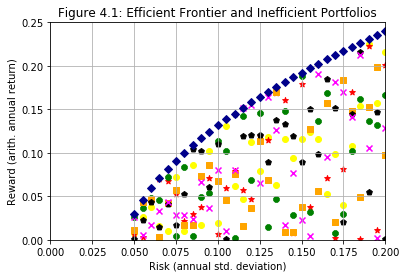

In [4]:
#Graph an efficient frontier with inefficient
#points below it
import matplotlib.pyplot as plt
import numpy as np

# evenly sampled standard deviation
t = np.arange(0.05, .2, 0.005)

#Plot the frontier
plt.plot(t, .7*(t-.04)**.5-.04, 'bD', color='darkblue')
markers=['o','*','8','s','p','x']
colors=['yellow','red','green','orange','black','magenta']
#Six sets of random inefficient portfolios
for i in range(6):
    s=np.random.uniform(0,1,len(t))
    plt.scatter(t, s*(.7*(t-.04)**.5-.04), marker=markers[i], color=colors[i])
plt.axis([0,.2,0,.25])
plt.title('Figure 4.1: Efficient Frontier and Inefficient Portfolios')
plt.xlabel('Risk (annual std. deviation)')
plt.ylabel('Reward (arith. annual return)')
plt.grid(True)
plt.show();

### 4.4.1 Equality-Constrained Frontier

Markowitz did not initially think about multiperiod portfolio construction, as that was too hard to deal with in 1952. Thus the issue of compounding and the relationship between arithmetic means and geometric (compound) means was avoided. He did not require multivariate normal distributions.

Finding an efficient portfolio n-vector $\boldsymbol{w}$ with a specified mean return $\mu$ is a quadratic optimization problem:
$$\text{Minimize  }\boldsymbol{w^{\prime}}C\boldsymbol{w}\tag{4.11}$$
$$\text{Subject to } \boldsymbol{w^{\prime}m=\mu} \text{ and } \boldsymbol{w^{\prime}u}=1$$

Of course there are many other constraints we might impose, the most obvious being non-negative holdings. In 1952, there was only one hedge fund that systematically had negative holdings (short sales). Today there are far more such portfolios, but there are also many portfolios that restrict themselves to non-negative holdings.

Long-only requirements are _inequality constraints_, which don't have a closed-form solution. If we just solve the equality-constrained problem in (4.11), we can use Lagrange multipliers. We take derivates with respect to $\boldsymbol{w}$ of the Lagrangian
$$\boldsymbol{w^{\prime}}C\boldsymbol{w}-\lambda_1(\boldsymbol{w^{\prime}m}-\mu)-\lambda_2(\boldsymbol{w^{\prime}u}-1)$$
which gives
$$2C\boldsymbol{w}-\lambda_1m-\lambda_2u=0$$
If $C$ is nonsingular, we have
$$\boldsymbol{w}=C^{-1}(\lambda_1 m + \lambda_2 u)\tag{4.12}$$
where we rescale the $\lambda's$ so we can drop a factor of 2.

Left-multiplying (4.12) by $\boldsymbol{m^{\prime}}$ and $u^{\prime}$, respectively, gives
$$\mu=m^{\prime}C^{-1}(\lambda_1 m+\lambda_2 u)$$
$$1=u^{\prime}C^{-1}(\lambda_1 m+\lambda_2 u)$$

Solving for the Lagrange multipliers $\lambda_1$ and $\lambda_2$ gives
$$\lambda_1=\frac{(u^{\prime}C^{-1}u)\mu-u^{\prime}C^{-1}m}{(u^{\prime}C^{-1}u)(m^{\prime}C^{-1}m)-(u^{\prime}C^{-1}m)^2}\tag{4.13}$$
We can solve for $\lambda_2$ as a function of $\lambda_1$:
$$\lambda_2=\frac{1-(u^{\prime}C^{-1}m)\lambda_1}{u^{\prime}C^{-1}u}\tag{4.14}$$
(4.13) expresses $\lambda_1$ as a function of the desired mean return $\mu$, or $\mu$ as a function of $\lambda_1$. It will be more convenient to look at it the second way, and retain $\lambda_1$ as a varying parameter that moves along the efficient frontier. Together with (4.12), (4.13) and (4.14) give the expression for efficient portfolios $\boldsymbol{w}$ as a function of the varying parameter $\lambda_1$:
$$w=\lambda_1\bigl(I-\frac{C^{-1}J}{u^{\prime}C^{-1}u}\bigr)C^{-1}m+\frac{C^{-1}u}{u^{\prime}C^{-1}u}\tag{4.15}$$
where $J=\boldsymbol{uu^{\prime}}$ is the nxn matrix of all ones. The variance at the solution is
$$w^{\prime}Cw=\lambda_1^2\bigl(\frac{(u^{\prime}C^{-1}u)(m^{\prime}C^{-1}m)-(u^{\prime}C^{-1}m)^2}{u^{\prime}C^{-1}u}\bigr)+\frac{1}{u^{\prime}C^{-1}u}\tag{4.16}$$

If we don’t care about mean return and just want the lowest variance portfolio possible, we set $\lambda_1=0$ and get
$$w_{minv}=\frac{C^{-1}u}{u^{\prime}C^{-1}u}\text{   and   }w_{minv}^{\prime}Cw_{minv}=\frac{1}{u^{\prime}C^{-1}u}\tag{4.17}$$

(4.15) is sometimes called the _Two-Fund Separation Theorem_ because of its linear form; efficient portfolios satisfying (4.15) lie along a line in n-space. Let $w_1$ be the value of (4.15) when $\lambda_1=1$; then any $w$ on the (4.15) efficient frontier can be expressed as $w=\lambda w_1+(1-\lambda)w_{minv}$ for some $\lambda>0$. Thus in the simplified world of (4.15), investors don't have to choose between $n$ investments; every investor merely needs to buy some $w_{minv}$ and some $w_1$, with only the proportion changing from investor to investor.

If we don’t care about variance and just want the highest mean portfolio possible, there is no bound. That is because so far we have not prevented leverage, which is measured by the sum of the positive entries in $\boldsymbol{w}$.
Thus if there are two assets with slightly different expected values, we could weight the higher one with a huge weight approaching infinity, and the lower one with one minus that weight. This two-asset portfolio has an expected return approaching infinity as the weight of the higher returning asset approaches infinity and the weight of the lower returning asset approaches minus infinity.

The hedge fund Long Term Capital Management reportedly used [leverage of around 25](http://clsbluesky.law.columbia.edu/2018/09/10/a-retrospective-on-the-demise-of-long-term-capital-management/), attempting to get near-infinite returns or at least near-infinite paychecks for its principals. Since $\boldsymbol{w^{\prime}u}=1$, leverage of 25 means that for every dollar invested in LTCM, the firm borrowed another \\$24 through short sales, and put \\$25 at risk. It would only take a drop of 4% in the value of its positive holdings (while the negative holdings didn't move) to bankrupt LTCM. LTCM no longer exists and its crash in 1998 nearly destroyed the entire financial system. As a practical matter limits – on holdings, on leverage – are imposed.

Reversing (4.13) to solve for $\mu$ in terms of $\lambda_1$, we obtain
$$\mu=m^{\prime}w=\lambda_1\bigl(\frac{(u^{\prime}C^{-1}u)(m^{\prime}C^{-1}m)-(u^{\prime}C^{-1}m)^2}{u^{\prime}C^{-1}u}\bigr)+\frac{u^{\prime}C^{-1}m}{u^{\prime}C^{-1}u}\tag{4.18}$$
Taking the square root of (4.16) gives the associated standard deviation as a function of $\lambda_1$:
$$\sqrt{w^{\prime}Cw}=\sqrt{\lambda_1^2\bigl(\frac{(u^{\prime}C^{-1}u)(m^{\prime}C^{-1}m)-(u^{\prime}C^{-1}m)^2}{u^{\prime}C^{-1}u}\bigr)+\frac{1}{u^{\prime}C^{-1}u}}\tag{4.19}$$
(4.18) and (4.19) allow us to draw an efficient frontier on a graph like Figure 4.1, where the x coordinate is given by (4.19) and the y coordinate is given by (4.18) as $\lambda_1$ varies from 0 to infinity.

### 4.4.2 Equality-Constrained Frontier: Example

We'll work an example using a portfolio of $n=3$ assets: Swiss francs (CHF), pounds sterling (&pound; or GBP), and Japanese Yen (&yen; or JPY). The portfolio is denominated in US dollars.

The code in the next cell retrieves the dollar per currency for these three currencies, and reports some general statistics:

In [51]:
import pandas as pd
import qrbook_funcs as qf
#Get 4 currencies until the end of
#previous year. Form sample covariance matrix
#and do simple efficient frontier calculations

lastday=qf.LastYearEnd()
#Swiss franc, Euro, pound sterling, Japanese Yen
#Euro will be used later in the chapter
seriesnames=['DEXSZUS','DEXUSEU','DEXUSUK','DEXJPUS']
cdates,ratematrix=qf.GetFREDMatrix(seriesnames,enddate=lastday)

#Convert levels to log-returns
#First take logs of the currency levels
#Swissie and yen are in currency/dollar, but
#the other two are dollar/currency. Reverse signs
#so everything is in dollar/currency

#Do each currency separately to account for separate missing data patterns
#dlgs is a list of lists of length 4 corresponding to the 4 currencies
#The value in dlgs is nan if there is missing data for the present or previous day's observation
#Otherwise it is the log of today/yesterday
multipliers=[-1,1,1,-1]
dlgs=[]
for i in range(4):
    lgrates=[]
    previous=-1
    for t in range(len(ratematrix)):
        if pd.isna(ratematrix[t][i]) or ratematrix[t][i]<=0:
            lgrates.append(np.nan)    #Append a nan
        else:
            if previous < 0:    #This is the first data point
                lgrates.append(np.nan)
            else:
                lgrates.append(np.log(ratematrix[t][i]/previous)*multipliers[i])
            previous=ratematrix[t][i]
    dlgs.append(lgrates)

#dlgs is the transpose of what we want - flip it
dlgs=np.transpose(dlgs)

#Delete any time periods that don't have data for the three
#long-term currencies
lgdates=[]
difflgs=[]
for t in range(len(dlgs)):
    d=np.delete(dlgs[t],1)
    if all(pd.notna(d)):
        #include this time period
        difflgs.append(dlgs[t])
        lgdates.append(cdates[t])

#Will use full difflgs later. For now, focus on the three long-term currencies
d=np.delete(np.array(difflgs),1,1)
c=np.cov(d.T)

#Take the means
m=np.mean(d,axis=0)

#display the output
#vectors and matrices are in fractional units;
#    fraction*100=percent
#    fraction*10000=basis point
#    (fraction^2)*10000=percent^2
np.set_printoptions(precision=4)
print("Means:",m*10000,"bps/day")
print("(CHF, GBP, JPY)\n")
print("  ",c[0]*10000)
print("C=",c[1]*10000,"    (4.20)")
print("  ",c[2]*10000)
print(f'(%/day)\N{SUPERSCRIPT TWO} units')
print("  ")
print("From",lgdates[idx],"to",lgdates[len(lgdates)-1],"(",len(lgdates),"observations)")

Means: [ 1.2476 -0.5009  0.98  ] bps/day
(CHF, GBP, JPY)

   [0.5276 0.2528 0.2239]
C= [0.2528 0.3592 0.1183]     (4.20)
   [0.2239 0.1183 0.4209]
(%/day)² units
  
From 1971-01-06 to 2017-12-29 ( 11787 observations)


The Swiss franc and the Japanese yen have appreciated versus the dollar since 1971, giving positive daily mean returns. The pound sterling has depreciated.

We're going to use the means shown above as the $\boldsymbol{m}$ vector in our calculations. This is a classic, and fatal, error:
><span style="color:red">**we are estimating future characteristics by naively using past characteristics.**</span>

We want to form a portfolio today that will carry us into the future. So we want to know the _expected values_, not the past sample values, of the mean vector and covariance matrix. Past sample values might be good estimators of expected values if the processes in question were _stationary_; that is, if they had unchanging parameters (see section x.x below). But the evidence is overwhelming that financial processes are not stationary over time.

Predicting the future from the past without understanding the generating process is doomed to failure. You can jump off a 50-story building and estimate, based on past experience for the first 49 stories, that you have a 100% ability to fly. Shortly after the $49^{th}$ story on the way down you will need to revise this estimate. You need to build gravity and the density of the terrain at the base of the building into your model of your location and health.

In fact, using past performance to predict the future is legally discouraged in the US and other jurisdictions. In the US, [the Code of Federal Regulations (17 CFR 230.156)](https://www.gpo.gov/fdsys/pkg/CFR-2003-title17-vol2/pdf/CFR-2003-title17-vol2-sec230-156.pdf) says

>Representations about past or future investment performance could be misleading because of statements ... including:
<br>- (A) Representations, as to security of capital, possible future gains or income, or expenses associated with an investment;
<br>- (B) Representations implying that future gain or income may be inferred from or predicted based on past investment performance; or
<br>- (C) Portrayals of past performance, made in a manner which would imply that gains or income realized in the past would be repeated in the future. 

Of course we need to learn from the past, but often (as with jumping off a building) it’s better to bring in some kind of model (gravity is at work) to predict the future. What we really want are accurate estimates of future means and covariances. We're using past statistics in this example just because it's a convenient way to generate numbers of the right order of magnitude to illustrate the calculations. We'll say more about better estimation methods later in the chapter.

For now, we can compute the inverse of $C$ in days/pct$^2$ units:

In [102]:
#invert the c matrix, which is in (fraction/day)^2 units
#so ci (c-inverse) is in (days/fraction)^2 units
ci=np.linalg.inv(c)
print("    ",ci[0]/10000)
print(f'C\N{SUPERSCRIPT MINUS}\N{SUPERSCRIPT ONE}=',ci[1]/10000,"    (4.21)")
print("    ",ci[2]/10000)
print(f'(days/%)\N{SUPERSCRIPT TWO} units')

     [ 3.3573 -1.9558 -1.2362]
C⁻¹= [-1.9558  4.2067 -0.1417]     (4.21)
     [-1.2362 -0.1417  3.0732]
(days/%)² units


From this we can compute the key quantities $u^{\prime}C^{-1}u$, $u^{\prime}C^{-1}m$, and $m^{\prime}C^{-1}m$:


In [111]:
#sum entries in ci
uciu=np.sum(ci)
print(f'u\'C\N{SUPERSCRIPT MINUS}\N{SUPERSCRIPT ONE}u =',uciu/10000,
      f'(days/%)\N{SUPERSCRIPT TWO}')

ucim=np.sum(np.matmul(ci,m))
print(f'u\'C\N{SUPERSCRIPT MINUS}\N{SUPERSCRIPT ONE}m =',ucim,
      'days')
mcim=np.matmul(m,np.matmul(ci,m))
print(f'm\'C\N{SUPERSCRIPT MINUS}\N{SUPERSCRIPT ONE}m =',mcim*10000,
      'bps')

u'C⁻¹u = 3.969846337167373 (days/%)²
u'C⁻¹m = 0.8111878199656062 days
m'C⁻¹m = 8.79299851331195 bps


Filling in these data in equations 4.15, 4.18, and 4.19 gives the numbers for our 3-currency example portfolio. Here $\sigma=\sqrt{w^{\prime}Cw}$ is the standard deviation of the efficient portfolio $\boldsymbol{w}$:

In [137]:
#Vectors for equation 4.15
u=[1]*3
vec2=np.matmul(ci,u)/uciu
vec1=np.subtract(np.matmul(ci,m),vec2*ucim)
print(f"w'=λ\N{SUBSCRIPT ONE}",vec1,"+",vec2,"    (4.15#)")

lambdacoeff=(uciu*mcim-ucim*ucim)/uciu
constmu=ucim/uciu
print(f'μ=(λ\N{SUBSCRIPT ONE} *',lambdacoeff*10000,")+",constmu*10000," bps/day    (4.18#)")

print(f'σ=sqrt(λ\N{SUBSCRIPT ONE}\N{SUPERSCRIPT TWO} *',lambdacoeff*10000,'+',10000/uciu,') (%/day)   (4.19#)')

w'=λ₁ [ 3.9229 -5.1169  1.1939] + [0.0416 0.5313 0.427 ]     (4.15#)
μ=(λ₁ * 8.627242556185893 )+ 0.20433733476556112  bps/day    (4.18#)
σ=sqrt(λ₁² * 8.627242556185893 + 0.25189891876609405 ) (%/day)   (4.19#)


Note the vector coefficient of $\lambda_1$ in (4.15#) has total weight zero (w/roundoff), and the constant vector in (4.15#) has total weight one; it is the global minimum variance solution.

In that solution, pounds sterling (the middle coefficient) have the highest weight. From (4.20) we can see that pounds had the lowest variance, but that alone does not explain why they have the highest weight. There are also second-order effects from correlations with the other currencies. The minimum variance portfolio has a variance that is even lower than the pound's variance.

This shows that _diversification_ is a key aspect of portfolio construction – if everything were linear as it is with returns we would have only pounds in the minimum variance solution. We don’t because of the quadratic balancing act. Figure 4.2 is the classic efficient frontier graph:

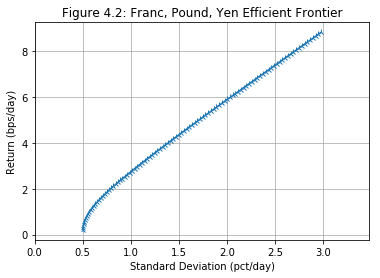

In [241]:
#Draw graph of simple efficient frontier
lambda1s=np.arange(0,1.01,.01)
xrisk=100*np.sqrt(lambdacoeff*lambda1s**2+1/uciu)   #Multiply by 100 for percent/day unites
yreturn=10000*(lambdacoeff*lambda1s+constmu)        #Multiply by 10000 for bp units

plt.figure(1)
plt.plot(xrisk,yreturn,marker='2')
plt.title("Figure 4.2: Franc, Pound, Yen Efficient Frontier")
plt.xlabel("Standard Deviation (pct/day)")
plt.ylabel("Return (bps/day)")
plt.xlim(0,max(xrisk)+.5)
plt.grid()
plt.show();

The global minimum variance portfolio in this example has positive weights as we saw in (4.15#). From the negative middle entry in the vector multiplying $\lambda_1$ in (4.15#), we can see that the weight of the pound will go negative as $\lambda_1$ gets larger:

In [139]:
print(f'Pound weight goes negative at λ\N{SUBSCRIPT ONE}=',-vec2[1]/vec1[1])
print('At that point μ=',-10000*lambdacoeff*vec2[1]/vec1[1]+10000*constmu,' bps/day')
print('and σ=',10000*np.sqrt(lambdacoeff*(vec2[1]/vec1[1])**2+1/uciu),' bps/day')

Pound weight goes negative at λ₁= 0.10383748372997502
At that point μ= 1.1001684933280618  bps/day
and σ= 58.72987077443066  bps/day


### 4.4.3 Inequality Constraints

Then as $\lambda_1\rightarrow\infty$, we borrow more and more pounds to fund investments in francs and yen, heading off to an infinite expected return. I stopped Figure 4.2 at $\lambda_1=1$, but it could keep going.

But letting $\lambda_1$ get arbitrarily large isn't a sensible thing to do. If we start with a dollar, borrow a billion dollars worth of pounds and buy a billion and one dollars of francs&yen, then the slightest disturbance in the relationships between francs, yen and pounds will bankrupt us. We can’t treat our estimated means and covariances as certainties and place infinite reliance on their accuracy.

Even if they were certain, we would have an absorbing barrier problem in the interim. That is, we can't have a net worth below zero; that's the definition of bankruptcy. We can draw a line on a graph that starts at \\$1, meanders down to -\\$0.10, and ends up at (positive) \\$3. But in reality, as soon as the line goes below zero, the entity represented by the line &mdash; a company, a fund, an investment &mdash; is bankrupt and will stop operating. That's similar to an absorbing barrier in physics, where a particle can meander only up to the point where it hits the sides of a container.

The mean-variance efficient frontier problem is often specified with the additional constraint that all weights must be non-negative. This changes the problem from one that can be solved in closed form to one that can be solved using a quadratic programming algorithm:
$$\text{Minimize } -\lambda m^{\prime}w + \frac{1}{2}w^{\prime}Cw$$
$$\text{Subject to } w^{\prime}u=1 \text{, each element of } w\geq0\tag{4.22}$$
In addition to the non-negative constraint, we have restated the problem slightly by building in a parameter $\lambda$ instead of a target mean $\mu$. This is the same idea as flipping (4.13) to (4.18). When $\lambda=0$, we solve for the global minimum variance portfolio. As $\lambda$ increases, we care more and more about return maximization and less and less about variance minimization. Thus $\lambda$ is a risk tolerance parameter &mdash; something like $-\frac{u^{\prime}}{u^{\prime\prime}}$ as seen in section 1.4.3.

The solution to the long-only optimization (4.22) is a piecewise series of solutions to the equality-constrained frontier (4.18) and (4.19). In the Franc/Pound/Yen frontier, for example, the equality-contrained minimum variance portfolio has all positive weights so it is also a solution to (4.22). The frontiers continue to coincide until the weight on the pound sterling goes to zero. Then the solution to (4.22) is the efficient frontier consisting only of the Swiss franc and the Japanese yen, shown in orange in Figure 4.3 below. Eventually the Swiss franc (the highest-returning single asset) becomes the whole portfolio and the (4.22) long-only frontier stops.

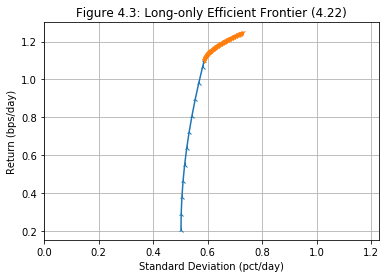

In [243]:
#Draw graph of long-only efficient frontier
#Segment with pounds
lambda_nopound=-vec2[1]/vec1[1]
lambda1s=np.arange(0,lambda_nopound,.01)
lambda1s=np.append(lambda1s,lambda_nopound)
x1=100*np.sqrt(lambdacoeff*lambda1s**2+1/uciu)   #Multiply by 100 for percent/day units
y1=10000*(lambdacoeff*lambda1s+constmu)        #Multiply by 10000 for bp units

#Get franc/yen portfolio at the point where pounds disappear
vec3=lambda_nopound*vec1+vec2
#rest of frontier decreases yen and increases francs
x2=[]
y2=[]
deltas=np.arange(0,vec3[2]*1.01,vec3[2]/100.)
for delta in deltas:
    newvec=vec3+[delta,0,-delta]
    y2.append(10000*np.matmul(newvec,m))
    x2.append(100*np.sqrt(np.matmul(np.matmul(newvec,c),newvec)))

plt.figure(1)
plt.plot(x1,y1,marker='2')
plt.plot(x2,y2,marker='1')
plt.title("Figure 4.3: Long-only Efficient Frontier (4.22)")
plt.xlabel("Standard Deviation (pct/day)")
plt.ylabel("Return (bps/day)")
plt.xlim(0,max(x2)+.5)
plt.grid()
plt.show();

### 4.4.4 Efficient Frontier and Utility Functions

The connection between portfolios that maximize utility functions and portfolios on the Markowitz efficient frontier is close but not perfect. For example, [L. B. Pulley, "Mean-Variance Approximations to Expected Logarithmic Utility"](https://www.jstor.org/stable/170783) concludes
>...investors maximizing expected logarithmic utility would hold virtually the same portfolios as investors maximizing certain mean-variance functions.

Similarly in a 1984 paper, [Kroll, Levy and Markowitz](https://www.jstor.org/stable/2327667) concluded
>for various utility functions and the historical returns on 3 different sets of securities, when a portfolio may be chosen from any of the infinite number of portfolios of the standard constraint set, the best mean-variance efficient portfolio has almost maximum obtainable expected utility.

One way of making the connection between utility functions and the Markowitz efficient frontier objective function is to consider a quadratic one-period risk-averse utility function on returns, i.e. one that looks like $u(z)=-z^2+az$, $a>0$. The coefficient of absolute risk aversion is $2/(a-2z)$ so this is risk-averse when $z<a/2$. That is, $u(z)$ “likes” more return for a while, but if the shock is too big (negative or positive), it gets unhappy.

The investor wants to maximize the expected utility of returns:
$$\mathbb{E}[u(r^{\prime}w)]=\mathbb{E}[-(r^{\prime}w)^2+a\cdot r^{\prime}w]=-w^{\prime}\mathbb{E}[rr^{\prime}]w+aw^{\prime}\mathbb{E}[r]$$
where $r$ is the random vector of one-period returns. We have already defined the mean vector $m=\mathbb{E}[r]$ and the covariance matrix $C=\mathbb{E}[(r-m)(r-m)^{\prime}]$. Thus
$$C=\mathbb{E}[rr^{\prime}-2rm^{\prime}+mm^{\prime}]=E[rr^{\prime}]-mm^{\prime}$$

So we have
$$\mathbb{E}[u(r^{\prime}w)]=-w^{\prime}Cw-(w^{\prime}m)^2+aw^{\prime}m$$

This is similar to the Markowitz objective function (4.22) (with $a=2\lambda$ and a change of sign) &mdash; although the covariance matrix is not de-meaned.

### 4.4.5 The Capital Market Line

The _capital market line_ is derived from the efficient frontier by the addition of a risk-free asset, i.e. a US Treasury or other instrument paying the risk-free rate that we discussed in Chapter 3. We assume the risk-free asset is nonstochastic, so it has no variance and no correlation with anything, including itself.

We can look for an efficient frontier in the usual way and just add the risk-free asset to our universe. However this will make our covariance matrix singular. The usual convention is to separate out the risk-free asset, which has a return $r_f$. For example, consider the franc, yen, pound efficient frontier. We zoom in to the beginning of the frontier and add a risk-free asset at (0,.1), i.e. $r_f=.1$bps/day.

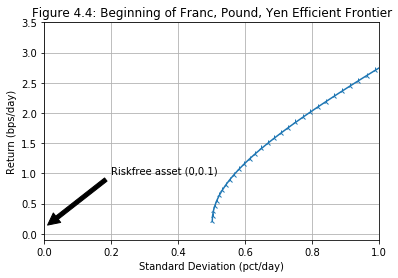

In [244]:
#Add a risk-free asset at .1 bps/day
rfrate=10**(-5)
plt.figure(2)
plt.plot(xrisk,yreturn,marker='2')
plt.title("Figure 4.4: Beginning of Franc, Pound, Yen Efficient Frontier")
plt.xlabel("Standard Deviation (pct/day)")
plt.ylabel("Return (bps/day)")
plt.xlim(0,1)
plt.ylim(-.1,3.5)
plt.annotate('Riskfree asset (0,'+str(10000*rfrate)+')', xy=(0, 10000*rfrate),
             xytext=(.2, 1),
            arrowprops=dict(facecolor='black', shrink=0.05),
            )
plt.grid()
plt.show();

We can now be more efficient than the (old) efficient frontier. A straight line that runs between the risk-free asset at $(0,r_f)$ and some point $(x,y)$ that is on the efficient frontier where $y\geq r_f$ will lie above the efficient frontier until $(x,y)$. That line just represents linear combinations of the efficient portfolio at $(x,y)$ and a portfolio consisting only of the risk-free asset.

In fact if we choose the tangency point where the slope of the line from $(0,r_f)$ to the efficient frontier just touches the top of the frontier, the will always be above the frontier. That optimal line is the new (including risk-free) efficient frontier and is called the _capital market line_. The two-fund separation theorem that we saw in formula (4.15) now becomes even simpler: the new efficient portfolios are linear combinations of the risk-free asset and the tangency portfolio.

To compute the capital market line, note that equations (4.18) and (4.19) specify the old efficient frontier; (4.18) is the y coordinate and (4.19) is the x coordinate. Taking the slope with the chain rule, we see that $\frac{dy}{dx}=\frac{x}{\lambda_1}$. For tangency, this slope must equal $\frac{y-r_f}{x}$, which is the slope of the line between $(x,y)$ and the risk-free asset’s representation.

Solving for $\lambda_1$ gives $\lambda_1=\frac{1}{u^{\prime}C^{-1}m - r_f(u^{\prime}C^{-1}u)}$. Putting this $\lambda_1$ into (4.12) gives the tangency portfolio $w_{tp}$:
$$w_{tp}=\frac{C^{-1}(m-r_f u)}{u^{\prime}C^{-1}m - r_f(u^{\prime}C^{-1}u)}=\frac{C^{-1}m_e}{u^{\prime}C^{-1}m_e}\tag{4.30}$$
where $m_e$ is the excess (over riskfree) return vector $m_e=m-r_f u$.

A portfolio $w$’s _Sharpe Ratio_ is $\frac{w^{\prime}m-r_f}{\sqrt{w^{\prime}Cw}}$, i.e. its excess expected mean return divided by its standard deviation. Note that in the mean/standard deviation graphs we have been drawing, the slope of a line that goes through the point $(0,r_f)$ is the Sharpe ratio of portfolios on that line. Thus the maximum Sharpe ratio efficient portfolio is the tangency portfolio; to see this, visualize the set of lines from $(0,r_f)$ to points on the efficient frontier.

The tangency (best efficient Sharpe ratio) portfolio has an excess expected return equal to
$$w_{tp}^{\prime}m_e=\frac{m_e^{\prime}C^{-1}m_e}{u^{\prime}C^{-1}m_e}\tag{4.31}$$
and a standard deviation
$$\sqrt{w_{tp}^{\prime}Cw_{tp}}=\frac{\sqrt{m_e^{\prime}C^{-1}m_e}}{u^{\prime}C^{-1}m_e}\tag{4.32}$$
Thus the Sharpe ratio of the tangency portfolio is
$$Sharpe(w_{tp})=\sqrt{m_e^{\prime}C^{-1}m_e}$$

If we go back to our currency example and add a risk-free asset with $r_f=.1$bp/day, the tangency portfolio looks like this:

In [141]:
#Print the tangency portfolio
rfvec=[rfrate]*3
tangencyport=np.matmul(ci,m-rfvec)/(ucim-rfrate*uciu)
print('Tangency portfolio:',tangencyport)
#Solve for the lambda1 at tangency
mutp=np.matmul(tangencyport,m.T)
sigmatp=np.sqrt(np.matmul(np.matmul(tangencyport,c),tangencyport.T))
tpl1=(mutp-constmu)/lambdacoeff
print('TP μ=',mutp*10000,' bps/day')
print('TP σ=',sigmatp*100,' pct/day')
print(f"λ\N{SUBSCRIPT ONE} at tangency:",tpl1)

Tangency portfolio: [  9.5126 -11.8222   3.3096]
TP μ= 21.032865078157474  bps/day
TP σ= 7.1089853529744005  pct/day
λ₁ at tangency: 2.4142740403719696


Drawing the line between the riskfree rate on the y axis and the tangency portfolio gives the orange capital market line in Figure 4.5:

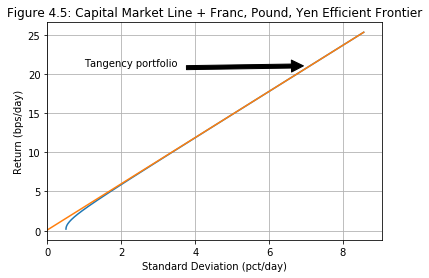

In [245]:
#Show capital market line
#Extend frontier
lambda1s=np.arange(0,tpl1+.5,.01)
xrisk=100*np.sqrt(lambdacoeff*lambda1s**2+1/uciu)
yreturn=10000*(lambdacoeff*lambda1s+constmu)

#Compute line
x=np.arange(0,max(xrisk),.01)
y=100*((mutp-rfrate)/sigmatp)*x+10000*rfrate

plt.figure(3)
plt.plot(xrisk,yreturn)
plt.plot(x,y)
plt.annotate('Tangency portfolio', xy=(sigmatp*100, mutp*10000),
             xytext=(1,mutp*10000),
            arrowprops=dict(facecolor='black', shrink=0.05),
            )
plt.title("Figure 4.5: Capital Market Line + Franc, Pound, Yen Efficient Frontier")
plt.xlabel("Standard Deviation (pct/day)")
plt.ylabel("Return (bps/day)")
plt.xlim(0,max(xrisk)+.5)
plt.grid()
plt.show;

The efficient frontier is near-linear by the time the capital market line touches it, so there is little difference between the capital market line and the original efficient frontier in this example. When the efficient frontier has more nonlinear shape &mdash; for example as a result of multiple constraints &mdash; there can be more separation between the capital market line and the efficient frontier

### 4.4.6 Benchmark-Relative

As a practical matter, many investment vehicles are constrained to invest in certain segments of the capital markets. For example, a mutual fund may advertise that it is a "large-cap US equity fund." Investors who favor big US companies can give a sum of money to the mutual fund manager, and the manager will decide which big US companies to buy with that money. The manager would be amiss &mdash; and legally culpable &mdash; if it didn't mostly$^1$ invest its investors' money in big US companies; to do otherwise would be false advertising. By the same token, investors can hardly blame the manager if big US stocks generally do poorly; they knew what they were getting into.

This situation is usually handled with a _benchmark portfolio_. Benchmark portfolios are often constructed by institutions that publish transparent benchmark composition rules intended to select certain market segments mechanically. For example, the FTSE/Russell company publishes the [Russell 1000&reg;](https://www.ftse.com/products/indices/russell-us) index of the one thousand largest stocks in Russell's universe; this is widely used as a large-cap US equity benchmark.

Risk is then redefined to be relative to the benchmark $b$; in our example $b=$Russell 1000&reg;, which itself would be considered to have no risk, while cash would have quite a lot of risk. Rather than $\sqrt{w^{\prime}Cw}$, the relevant volatility would be $\sqrt{(w-b)^{\prime}C(w-b)}$; this benchmark-relative volatility is called _tracking error_. The objective function in an optimization like (4.22) would change to $-\lambda m^{\prime}(w-b) + \frac{1}{2}(w-b)^{\prime}C(w-b)$.

<br><br>
<font size=1>$^1$In the US, "mostly" means [80% or more](https://www.sec.gov/rules/final/ic-24828.htm)</font>

### 4.4.7 Efficient Frontiers: Theory and Practice

While Markowitz started the field of quantitative finance and his work was revolutionary, investors quickly found that it often didn’t work as well as the qualitative methods they were using before 1952. One problem is that the quadratic optimization process doesn’t know that the numbers (means, covariances) it is given can be wrong. While a human would be skeptical about large, too-good-to-be-true returns, the optimization process is likely to put a heavy weight on a security with a too-good-to-be-true return.

Even realistic returns can lead to unrealistic results. A human would think that the difference between two securities, both with very similar covariances to the rest of the universe, and one with a mean of 1.12345 and the other 1.12346, was random. It wouldn't make much difference if you were buying one or the other. But as we noted in section 4.4.1, if you're buying one and selling the other, then any small difference between securities can be exploited with enough leverage. An unconstrained optimizer would go massively long the higher return one and massively short the lower, thereby multiplying random estimation errors.

In fact most of our currency example efficient frontier was highly leveraged and would be unattainable with the long only constraint; most of the “results” could be suspect. Thus, as we’ve already noted, in many cases holdings are constrained to be long only; this stops solutions from having any leverage. 

Despite the problems with naively using past statistics to predict the future, past (sample) covariance matrices are often used to estimate expected covariances. In fact a great deal of effort has been spent on understanding how covariances change over time; we'll discuss these efforts in Chapters x and y below. But covariances are less variable than sample mean returns. So there are a number of estimation methods that start with sample covariance matrices and then try to modify them so they are better predictors.

Sample covariance matrices are, by construction, at least positive semidefinite and possibly positive definite. We need $n$ time periods of observation to make an $n\times n$ covariance matrix nonsingular, but even if we have that many periods we still might not have a rich set of data for each entry. There are $n+1\choose 2$ different numbers in a covariance matrix. In every time period we observe $n$ rates of return. So if we have $t$ periods of observations, the number of observables per covariance is $\frac{2t}{n+1}$. For example, for the Russell 1000&reg; index, we would need 5005 time periods if we wanted to have a not very impressive ten observations per covariance.

5005 observations is about twenty years at a daily periodicity, which limits the number of companies that can be considered, as many do not have public trading data for that long. Too, daily observations are only valid for the most heavily traded stocks; a lightly traded stock may not have any meaningful trading activity after (say) 2PM, while more heavily traded stocks continue trading (and reacting to news) until 4PM. The day's return on the lightly traded stock is then asynchronous with the day's returns on more heavily traded stocks. That in turn can lead to misleadingly low correlations. Longer periodicities, like monthly, are often used to address this problem. A few hours of missing price movements out of a month is less noticeable than a few hours missing from a day. But at a monthly periodicity, any sample covariance matrix of the Russell 1000&reg; will be singular. That in turn causes problems with solving optimizations as in (4.12), which will no longer have a unique solution.

Even when covariance matrices aren't singular, they can have problems. The _condition number_ of a matrix is the ratio of its largest eigenvalue to its smallest eigenvalue. The larger the condition number, the more likely it is that a very small change in input variables (means and covariances) can make a very large change in output variables (weights of the optimal solution). 

Because of the generally poor quality of covariance matrices, most users of optimizers put bounds on many quantities in addition to long-only (or not-too-short) constraints. Individual holdings usually have concentration limits – e.g. no single stock can occupy more than 5% of the portfolio. If the optimization is benchmark-relative, then constraints like “every security must be within plus or minus 2% of the benchmark’s weight in that security" can be set. Constraints are often placed on other relevant characteristics like industries, countries, property types (in real estate portfolios), and duration/credit quality (in fixed income portfolios).

Setting limits produces sensible portfolios, since the limits are set sensibly. But in effect it gives the answer to the optimizer – if the user is not careful, an optimizer can become a [smokescreen for the judgments of the human who put in very restrictive limits](https://www.jstor.org/stable/4479185)

### 4.4.8 Shrinkage Estimators

Practitioners often use methods intended to improve parameter estimates, sometimes in conjunction with proprietary views on the future direction of markets. Many such methods take the form of _shrinkage estimators_. The general idea is similar to Bayes’ theorem: we have some kind of prior belief about a quantity we are trying to estimate, and we “shrink” the deviations from the prior in some way. Often the prior is _centralized_, meaning it is based on some kind of marketwide average value.

An example of a centralized prior for an efficient portfolio is the vector $w=\frac{1}{n}u$; which indicates that everything in the universe is of equal importance without knowing anything about means and covariances. [Bouchard, Potters & Aguilar$^2$](https://arxiv.org/abs/cond-mat/9707042) had this prior in mind when they suggested maximizing a nonparametric portfolio diversification measure like entropy:
$$\exp\bigl(-\sum{w_i\cdot ln(w_i)}\bigr)$$
or an inverse [Herfindahl-Hirschman](https://www.jstor.org/stable/1818582) index
$$\frac{1}{\sum{w_i^2}}=\frac{1}{w^{\prime}w}$$
Here $w_i$ are the scalar components of the portfolio vector $w$, where as usual $w^{\prime}u=1$. For both metrics, the worst case is the intuitively most concentrated: one $w_i=1$ and the others equal to zero. Both measures equal one in that case. If $w\geq 0$, then for both measures the best case (where the measures equal $n$) is $w_i=1/n$ (in vectors, $w=\frac{1}{n}u$).

The Bouchard, Potters & Aguilar suggestion was to add one of the diversification measures to the portfolio optimization problem, so for example the objective in (4.22) would be changed to
$$\text{Minimize } -\lambda m^{\prime}w + \frac{1}{2}w^{\prime}\bigl(C+\gamma I\bigr)w\tag{4.40}$$
With a sufficiently large $\gamma$ parameter, the optimization will focus more on minimizing the nonparametric Herfindahl-Hirschman Index, and less on the quantities $m$ and $C$ that need estimating. This can produce a solution that mitigates the problem of too-heavy reliance on random noise in inputs, pushing solutions toward $w=\frac{1}{n}u$.

The problem of parameter estimation is so large that some have suggested giving up on it altogether. [DeMiguel, Garlappi, and Uppal 2007](https://papers.ssrn.com/sol3/papers.cfm?abstract_id=911512) considered the "1/N rule," which in our notation means forming the portfolio $w=\frac{1}{n}u$ &mdash; the same as giving infinite weight to the $\gamma$ parameter in (4.40). DeMiguel et. al. evaluated out-of-sample performance of a number of variations on parameter estimation for Markowitz-type mean-variance optimization. They
>find that none is consistently better than the 1/N rule in terms of Sharpe ratio, certainty-equivalent return, or turnover. This finding indicates that, out of sample, the gain from optimal diversification is more than offset by estimation error... This suggests that there are still many "miles to go" before the gains promised by optimal portfolio choice can actually be realized out of sample. 

For example, the [_James-Stein shrinkage estimator_](http://digitalassets.lib.berkeley.edu/math/ucb/text/math_s4_v1_article-19.pdf) for the vector of multivariate normal means can be applied to the prior belief that all means are equal to some common scalar value $\mu_0$. The observed mean vector $m$ is then pushed some way back to this prior. A scalar $s$ is used to calibrate how far to push back:
$$s=\min\bigl(1,\frac{n-2}{T(m-\mu_0u)^{\prime}C^{-1}(m-\mu_0u)}\bigr)\tag{4.41}$$
where $n$ is the number of variables in the vectors and $T$ is the number of observations (often time periods). The revised mean vector estimate is then
$$m_{new}=(1-s)m+s\mu_0u\tag{4.42}$$
The default mean $\mu_0$ can for example be the average of all the means in m ($\mu_0=\frac{m’u}{n}$).

This seems like a sensible, quasi-Bayesian, heuristic for not relying too much on possibly erroneous sample data. But James and Stein showed something remarkable about this estimator: if there is a true (but unknown) population mean vector $m_{true}$, then
$$(m_{true}-m)^{\prime}C^{-1}(m_{true}-m)\geq(m_{true}-m_{new})^{\prime}C^{-1}(m_{true}-m_{new})\tag{4.43}$$
That means that in some sense, the new estimator is guaranteed to be closer to the unknown true mean vector than the original. That's _for any value of $\mu_0$_! So you can just pick a $\mu_0$ randomly and you'll get closer to the true mean vector than your sample mean vector $m$. Of course an outrageous $\mu_0$ will cause the $s$ in (4.41) to be very small, so there won't be much adjustment. But it will be in the right direction!

A similar idea is seen in the [_Jorion shrinkage estimator_](https://www.jstor.org/stable/2331042), formed by taking
$$s=\frac{n+2}{n+2+T(m-\mu_{min})^{\prime}C^{-1}(m-\mu_{min})}\text{, where }\mu_{min}=\frac{m^{\prime}C^{-1}u}{u^{\prime}C^{-1}u}\tag{4.44}$$
and then applying the shrinkage combination in (4.42). Note that $\mu_{min}$ is the return on the global minimum variance portfolio we obtained in the original equality-constrained version of the Markowitz efficient frontier, i.e. the value of (4.18) when $\lambda_1=0$.

We can similarly apply shrinkage estimators to the covariance matrix. In a 1978 paper, [Elton & Gruber](https://www.jstor.org/stable/2326368) pointed out that there appeared to be little information in covariance matrices off the diagonal, and suggested just setting every correlation to the same value. They were reluctant to do this, saying
>In this section, we will assume that all pairwise correlation coefficients are equal. While this probably does not represent the true pattern one finds in the economy, it is very difficult to obtain a better estimate. Elsewhere we have shown that this assumption produces better estimates of future correlation coefficients than do historical correlation coefficients...

This was later refined by [Ledoit and Wolf in 2003](https://papers.ssrn.com/sol3/papers.cfm?abstract_id=433840) as a shrinkage process with a constant-correlation prior. Let $R=S^{-1}CS^{-1}$, where $C$ is a samnple covariance matrix and $S=\sqrt{diag(C)}$ is the matrix with sample standard deviations on the diagonal and zeroes elsewhere. $R$ is the sample correlation matrix. Let $\rho_{average}=\frac{u^{\prime}Ru-n}{n(n-1)}$ be the average off-diagonal correlation. Then the constant correlation covariance matrix is
$$C_{\rho}=S(I+\rho_{average}(J-I))S$$
where as usual $J=uu^{\prime}$ is the matrix of all ones.

The Ledoit-Wolf covariance shrinkage estimator is
$$C_{new}=sC_{\rho}+(1-s)C\tag{4.46}$$
where s is a scalar shrinkage parameter – the larger s is, the less trust you have in your correlations. Ledoit and Wolf give the following rather elaborate estimate of $s$:
- First, define $y_{it}$ as the de-meaned observation of the $i^{th}$ security's return in time period $t$, so that $\sum_t y_{it}=0$. Then if $Y$ is the sample de-meaned return matrix ($n\times T$), then $C=\frac{1}{T}YY^{\prime}$ is the sample covariance matrix.
- Second, define $f_{ij}$ as the $(i,j)$ element of $C_{\rho}$ and $s_{ij}$ as the (i,j) element of $C$.
- Third, compute $\hat{\pi}=\sum_i\sum_k\pi_{ij}$ where $\pi_{ij}=\frac{1}{T}\sum_{t=1}^T\bigl(y_{it}y_{jt}-s_{ij}\bigr)^2$
- Fourth, compute $\hat{\nu}_{ii,ij}=\frac{1}{T}\sum_{t=1}^T\bigl(y_{it}^2-s_{ii}\bigr)\bigl(y_{it}y_{jt}-s_{ij}\bigr)$. Then compute $\hat{x}=\sum_{i=1}^n\pi_{ii}+\frac{\rho_{average}}{2}\sum_{i=1}^n\sum_{j=1,j\neq i}^n\bigl(\sqrt{\frac{s_{jj}}{s_{ii}}}\hat{\nu}_{ii,ij}+\sqrt{\frac{s_{ii}}{s_{jj}}}\hat{\nu}_{jj,ij}\bigr)$
- Fifth, compute $\hat\gamma=\sum_{i=1}^n(f_{ij}-s_{ij})^2$
- Sixth, set $s=\frac{\hat{\pi}-\hat{x}}{\hat{\gamma}}$. Ledoit and Wolf suggest bounding this between 0 and 1 if necessary.

While this estimate of the optimal shrinkage intensity $s$ is quite complicated to write down, it is not hard to program. An easier heuristic is to set $s$ equal to the fraction of the trace contained in the correlation matrix’s first $\sqrt{n}$ eigenvalues.

<br><br>
<font size=1>$^2$Bouchard, Potters & Aguilar are physicists who now run a quantitative hedge fund in Paris (www.cfm.fr).</font>

### 4.4.9 Resampled Efficient Frontier

Shrinkage techniques deal with estimation error in means and covariances, but not directly with finding the portfolios on the efficient frontier. In 1992, [Philippe Jorion](https://www.jstor.org/stable/4479507) addressed the problem of finding efficient frontiers directly with the following procedure:
>1. Compute the means and covariance matrix from the actual sample of historical returns. Define T as the sample size (number of months, say) and N as the number of assets. Perform the optimization, given the stated objective function and investor constraints.
>2. Assume that the estimates from Step 1 are true values. From a multivariate standard normal distribution with these parameters, draw one random sample of N joint returns. This represents one month of simulated returns. Sample again until T months are generated.
>3. Estimate from these simulated returns a new set of means and a new variance-covariance matrix; perform an optimization using these inputs. The simulated optimal portfolio provides one observation in the distribution of the original optimal portfolio.
>4. Repeat Steps 2 and 3 until the distribution of the optimal portfolio is approximated with enough precision.

We can follow Jorion's procedure to see how much ambiguity there is in the minimum-variance portfolio $\frac{C^{-1}u}{u^{\prime}C^{-1}u}$ from our three-currency example:

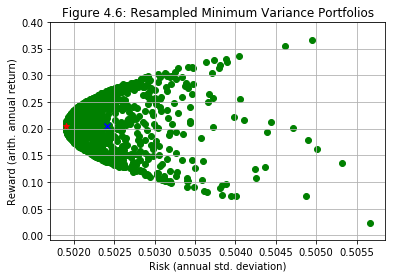

In [246]:
#Resample the minimum variance portfolio from 3-currency example
samp_size=1000
samp_time_periods=1000
samp_stds=[]
samp_means=[]
samp_portfolios=[]
for trial in range(samp_size):
    #Generate a virtual history of returns in x
    x=np.random.multivariate_normal(m,c,samp_time_periods)
    #Compute the virtual history's mean, covariance, and inverse covariance
    samp_m=np.mean(x,axis=0)
    samp_c=np.cov(x.T)
    samp_ci=np.linalg.inv(samp_c)
    #Compute minimum variance portfolio s_vec2 according to new parameters
    s_uciu=np.sum(samp_ci)
    s_vec2=np.matmul(samp_ci,u)/s_uciu
    #Find the mean and standard deviation of this portfolio according to the old parameters
    samp_means.append(10000*np.matmul(s_vec2,m))
    samp_stds.append(100*np.sqrt(np.matmul(np.matmul(s_vec2,c),s_vec2)))
    samp_portfolios.append(s_vec2)

#Plot the minimum variance portfolios 
plt.scatter(samp_stds,samp_means,marker='o',color='green')
#Plot the original MV portfolio
plt.scatter(np.sqrt(10000./uciu),10000.*ucim/uciu,marker='*',color='red')
#Plot the average of the resampled MV portfolios
plt.scatter(np.mean(samp_stds),np.mean(samp_means),marker='x',color='blue')
#Zoom in on the x-range
xdiff=np.max(samp_stds)-np.min(samp_stds)
plt.xlim(np.min(samp_stds)-.05*xdiff,np.max(samp_stds)+.05*xdiff)
plt.title('Figure 4.6: Resampled Minimum Variance Portfolios')
plt.xlabel('Risk (annual std. deviation)')
plt.ylabel('Reward (arith. annual return)')
plt.grid(True)
plt.show();

There's a very large range of mean returns of the resampled minimum variance portfolio shown in Figure 4.6. The standard deviations (x-axis) are less variable, but even they show not only a range, but also an inevitable upward bias. The red marker is the original minimum variance portfolio, which is the only efficient portfolio on the graph according to the original parameters. The blue marker is the average of the sample characteristics, which is riskier than the original minimum variance portfolio. The difference between the blue marker and the red marker is an indication of how overly optimistic we were about our ability to get a low-variance portfolio.

There's also uncertainty about the weights. We can compute a 95% confidence interval for them from the sample:

In [217]:
#Show the 95% confidence intervals for the MV portfolio    
bottom=np.percentile(samp_portfolios,5,axis=0)
middle=np.percentile(samp_portfolios,50,axis=0)
top=np.percentile(samp_portfolios,95,axis=0)
print("95% confidence for MV portfolio:")
print("Bottom of interval: ",bottom)
print("Middle of interval: ",middle)
print("Original MV port:   ",vec2)
print("Top of interval:    ",top)

95% confidence for MV portfolio:
Bottom of interval:  [-0.0054  0.486   0.3903]
Middle of interval:  [0.0428 0.5312 0.4273]
Original MV port:    [0.0416 0.5313 0.427 ]
Top of interval:     [0.0885 0.5747 0.4659]


Typically we see that zero is in the confidence interval for the first (Swiss franc) weight, so we're not even sure we should have any in the minimum variance portfolio. The range of pound sterling (second) and Japanese yen (third) weights are typically about 8% wide. And the minimum variance portfolio is generally the most stable since it doesn't use the mean vector as an input!

A _resampled efficient frontier_ takes this resampling process and averages it to get a collection of optimal mean-variance portfolios that, it is hoped, will have less dependence on sampling noise. One way of averaging was proposed by Richard Michaud$^3$ in 1998; Michaud has a [US patent](https://patents.google.com/patent/US6003018A/en) on this method, which is offered commercially through the firm [New Frontier Advisors](https://www.newfrontieradvisors.com/).

Michaud aggregates the minimum variance portfolios from each sample as we did above. He then chops the remainder of the efficient frontier from the minimum variance to the maximum return &mdash; assuming there is a maximum return &mdash; into an equal number of steps. For example suppose the original frontier had a minimum return of .2 and a maximum of 2 and there were 10 steps desired along the frontier; then 10 efficient portfolios $P_{1,0}$ with return .2; $P_{2,0}$ with return .4; ...; and $P_{10,0}$ with return 2 would be recorded. Then a resampled frontier would be generated for simulation 1; say its minimum and maximum returns were .15 and 2.88. The compositions of the 10 portfolios $P_{1,1}$ with return .15; $P_{2_1}$ with returns .47; ...; and $P_{10,1}$ with return 2.88 would be recorded. The resampled frontier would then consist of the 10 portfolios $\frac{1}{S+1}\sum_{s=0}^S P_{i,s}$ 

The Michaud method essentially aggregates resampled portfolios by target mean. Another method is offered by [Morningstar/Ibbotson](https://corporate.morningstar.com/Fib/documents/MethodologyDocuments/ResearchPapers/RobustAssetAllocation.pdf) which essentially aggregates by target standard deviation; their description is:
>Ibbotson uses a proprietary "bin approach," in which asset allocations from the _simulated_ portfolios are grouped together based on narrowly defined standard deviation ranges that cover the risk spectrum. The average asset allocations are then linked back to the original inputs to plot the resampled efficient frontier.

Whichever method is used, the general idea is to (a) lower and (b) estimate sampling noise through a process of resampling. [Bernd Scherer](https://www.jstor.org/stable/4480438) points out that resampling methods will average out to the original efficient frontier when there are no constraints in the optimization process, but when there are constraints - for example, long-only holdings - the resampled frontier will generally improve on the original frontier. That is, empirical tests have generally shown that resampled frontiers do better at predicting out-of-sample (future) behavior than the original efficient frontier. But resampling is a heuristic rather than a proof, and practitioners continue to search for even better heuristics to predict out-of-sample behavior.
<br><br>
<font size=1>$^3$ The father-and-son team of Richard Michaud and Robert Michaud wrote _Efficient Asset Management: A practical Guide to Stock Portfolio Optimization and Asset Allocation_ in 1998; the second edition is from 2008 and is published by Oxford University Press, ISBN 978-0-19-533191-2.</font>

## 4.5 The Capital Asset Pricing Model and the Four-Factor Model

The Capital Asset Pricing Model, or CAPM, may be the most widely known model from the field of quantitative finance. Despite the fact that empirical tests of the CAPM generally fail to show that it holds in practice, it remains widely popular. The model is variously attributed to Jack Treynor, William Sharpe, John Lintner, and Jan Mossin, who all independently published versions of it in the early 1960s. Sharpe (who had been a PhD student of Harry Markowitz at UCLA) was awarded the [1990 Sveriges Riksbank Prize in Economic Sciences in Memory of Alfred Nobel](https://www.nobelprize.org/prizes/economic-sciences/1990/sharpe/facts/) largely for this work.

[Sharpe's 1964 version](https://www.jstor.org/stable/2977928) of the CAPM$^4$ is essentially something we've already seen: it's basically Figure 4.4. Sharpe assumed that investors want to choose efficient portfolios; that they can borrow and lend at a riskfree rate $r_f$; and that they all agree on the joint probability distribution of asset returns. The last assumption is particularly counterfactual &mdash; investors have wildly different expectations of future returns, volatilities, and correlations. Sharpe acknowledges this is "undoubtedly unrealistic." The hope is that while individual investors may disagree, in aggregate they will act as if they agree.

Under Sharpe's assumptions, everyone will want to be somewhere on the orange line in Figure 4.4. In that case, in equilibrium the tangency portfolio will simply be the market portfolio of all available assets, capitalization-weighted - that is, weighted by how much of each asset is available in the market. Since all investors will hold linear combinations of the risk-free asset and the market porfolios, individual assets will be forced in equilibrium to fall on that line as well. Thus each security $s$'s expected return $r_s$ can be expressed as
$$\mathbb{E}[r_s]-r_f=\beta_s (\mathbb{E}[r_m]-r_f)\tag{4.60}$$
If $\beta_s=0$, then the investor holds only the risk-free asset; if $\beta_s=1$ then the investor holds the market (tangency) portfolio. We must have $\beta_s=\frac{Cov(r_s,r_m)}{Var{r_m}}$.

Removing expectations, the CAPM says we must have
$$r_s-r_f=\beta_s (r_m-r_f)+\epsilon_s\tag{4.61}$$
where $Cov(\epsilon_s,r_m)=Cov(\epsilon_s,\epsilon_t)=0$ (for $s\neq t$), and $\mathbb{E}[\epsilon_s]=0$. $\epsilon_s$ is the _idiosyncratic_ or _non-systematic_ behavior of the security, while $r_f+\beta_s(r_m-r_f)$ is the _systematic_ behavior. 

Because of the central role of the beta coefficient, users of the CAPM might simply say they are using betas to describe security behavior.

In the decades since its origin, the CAPM has been massively tested, discussed, modified, and retested. By 1980, Anise Wallace published a cleverly titled article in _Institutional Investor_: "Is Beta Dead?" In corporate finance, betas were (and still are) very much alive for cost-of-capital calculations. In business schools, CAPM is very much alive as it is taught to MBA students as possibly the only market model they need to know.

For portfolio managers composing investment portfolios, beta was never really alive. By assumption the CAPM precludes any systematic ability to beat the market, so active (non-index) investors will find little to help them find superior investments. They can and do use CAPM as a benchmark, but even that use has only weak empirical support.

In academia, debate about CAPM raged on. If the CAPM is correct and the market is the only systematic factor in security returns, we should not be able to observe systematic correlations between $\epsilon_s$ and $\epsilon_t$ for $s\neq t$. A large "anomaly" literature developed showing that certain systematic characteristics could predict security behavior better than the market, so the $\epsilon_s$ were not really independent. For example, in 1981 [Rolf Banz](https://www.sciencedirect.com/science/article/pii/S0304405X11001942) and [Marc Reinganum](https://www.jstor.org/stable/4478439) independently showed the "size anomaly:" small companies behave systematically differently than large companies, in a way that can't be explained by differing betas.

[Fama and French 1992](https://onlinelibrary-wiley-com.clsproxy.library.caltech.edu/doi/epdf/10.1111/j.1540-6261.1992.tb04398.x), and in subsequent papers looked at some previously documented anomalies like company size and "value" (high book-to-price ratios), and defined a three-factor risk model. Later work by [Mark Carhart](https://www.jstor.org/stable/2329556) extended this to what is now the standard academic four-factor equity risk model:
$$r_s-r_f=\beta_{m,s} (r_m-r_f)+\beta_{sz,s}SMB+\beta_{val,s}HML+\beta_{mom,s}UMD+\epsilon_s\tag{4.62}$$
In addition to the familiar market beta (which has been recaptioned $\beta_{m,s}$), three new betas to three new factors are added:
- $\beta_{sz,s}$ is the beta of security $s$ to the size factor $SMB$ ("small minus big"), which captures the difference in returns between a cohort of small stocks and a cohort of big stocks. That is, $\beta_{sz,s}=\frac{Cov(r_s,SMB)}{Var(SMB)}$.
- $\beta_{val,s}$ is the beta of security $s$ to the size factor $HML$ ("high minus low"), which captures the difference in returns between a cohort of high book-to-market ratio stocks and a cohort of low book-to-market ratio stocks.
- $\beta_{mom,s}$ is the factor added due to Carhart's work; it is the beta of security $s$ to the momentum factor $UMD$ ("up minus down"), which captures the difference in returns between a cohort of stocks which have had high momentum over the previous year (i.e. relatively good returns) and a cohort of low momentum stocks.

Most academic work on equity phenomena since the late 1990's has been done with reference to this four-factor model. However it is virtually absent from practitioner work.

<br><br>
<font size=1>$^4$ In a footnote, Sharpe says "After preparing this paper the author learned that Mr. Jack L. Treynor, of Arthur D. Little Inc., had independently developed a model similar in many respects to the one described here. Unfortunately Mr. Treynor's excellent work on this subject is, at present, unpublished."</font>

## 4.6 Black-Litterman

[Black-Litterman](http://jfi.iijournals.com/content/1/2/7) is another attempt to deal with poor estimation of the Markowitz parameters, in this case through a Bayesian framework. "Black" is Fischer Black, whose contributions to mathematical finance include (among many others) the Black-Scholes option pricing formula and two of the models in section 3.8.4. "Litterman" is Robert Litterman, who headed quantitative management at Goldman Sachs Asset Management and who we have already seen in the Litterman-Sheinkman paper in section 3.5.5. 

In the Black-Litterman framework, we assume there is a true but unobservable expected mean vector $\mu$ that is associated with the process generating asset returns. Before updating our information to estimate $\mu$, we have a prior belief: namely that it is consistent with the Capital Asset Pricing Model. Thus our prior is
$$\mu_{CAPM}=r_f u + (\mathbb{E}[r_M]-r_f)\beta\tag{4.70}$$
where $r_M$ is the scalar random variable giving returns on the market, and $\beta$ is an n-vector giving the beta of each of the $n$ assets in the market.

Our error of estimate is given by a multivariate normal distribution with mean 0 and covariance matrix $sC$, where $s$ is a confidence scalar. If s=0, we are perfectly confident that $\mu_{CAPM}$ is the right answer. As s gets larger, we get less confident. $C$ might be estimated from historical returns or from an equity model. Note however that a full covariance matrix $C$ is not consistent with the CAPM, which assumes $C=\sigma_M\beta^{\prime}\beta$.

In the Black-Litterman framework, we can express views (opinions) about the actual mean return n-vector $\mu$. A view is a value of some linear combination of returns. The simplest view is that a return on a particular asset will take on a particular value, but we can also (for example) express a view on an industry (a weighted combination of the assets in that industry), or on one group of assets versus another (a hedge or relative value trade). In general, we write
$$p=V\mu+\epsilon\tag{4.71}$$
where V is a $v\times n$ matrix whose rows are the linear combinations expressing the form of our views, of which we have v. p is a v-vector giving the outcomes of the views. $\epsilon$ is an error v-vector with mean 0.

For example, if we believe pharmaceutical stocks will outperform energy stocks by 12%, a row of $V$ would have positive weights (perhaps capitalization-weighted) on all the pharmaceutical stocks and negative weights on energy stocks, and the corresponding row of the v-column-vector $p$ would be 12%.

We are trying to minimize the error term $\epsilon$ on the right-hand side. To do this, we could solve a standard ordinary least squares (OLS) regression using least squares, obtaining $\mu=(V^{\prime}V)^{-1}V^{\prime}p$. However in accordance with our theme of keeping track of how much we don’t trust our parameters, we assume that the error vector $\epsilon$ is multivariate normally distributed with mean 0 and $v\times v$ covariance matrix $\Gamma$. The smaller the entries of $\Gamma$, the more confident we are in our views. Usually we assume off-diagonal elements are 0, and that really is just to make things easier.

When we have an error matrix like $\Gamma$, we can use an extension of ordinary least squares regression called generalized least squares (GLS). The idea is to modify OLS regression by weighting the variables we are more sure about more heavily, and the variables we are less sure about less heavily. The GLS solution is
$$\mu_{views}=(V^{\prime}\Gamma^{-1}V)^{-1}V^{\prime}\Gamma^{-1}p\tag{4.74}$$

We have two equations involving our estimate of $\mu$ – one from the CAPM (4.70) and one from views (4.74). We can put them together and minimize the errors using GLS again. We put everything together into these vectors:
$$y=\left( {\begin{array}{c}
   \mu_{CAPM} \\
   p \\
  \end{array} } \right);
M=\left( {\begin{array}{c}
   I \\
   V \\
  \end{array} } \right);
E=\left( {\begin{array}{cc}
   sC & 0 \\
   0 & \Gamma \\
  \end{array} } \right)\tag{4.75}
$$
Plugging the quantities in (4.75) into a GLS like (4.74) gives
$$\mu=\left(\frac{1}{s}C^{-1}+V^{\prime}\Gamma^{-1}V\right)^{-1}\left(\frac{1}{s}C^{-1}\mu_{CAPM}+V^{\prime}\Gamma^{-1}V\mu_{views}\right)\tag{4.76}$$
Recall that $s$ is the scalar that shows how much we disbelieve the prior &mdash; the CAPM view. As $s\rightarrow 0$, the views become less and less important and the estimate of $\mu$ approaches $\mu_{CAPM}$. On the other hand, as $s\rightarrow\infty$, the CAPM prior becomes less and less important and the views dominate, giving $\mu_{views}$ when the expressions make sense.

In this case – when the matrices are well-behaved enough – we can write
$$\mu=M_{CAPM}\mu_{CAPM}+(I-M_{CAPM})\mu_{views}\text{, where}$$
$$M_{CAPM}=\left(\frac{1}{s}C^{-1}+V^{\prime}\Gamma^{-1}V\right)^{-1}\frac{1}{s}C^{-1}\text{  and}\tag{4.77}$$
$$M_{views}=\left(\frac{1}{s}C^{-1}+V^{\prime}\Gamma^{-1}V\right)^{-1}V^{\prime}\Gamma^{-1}V\text{   so}$$
$$M_{CAPM}+M_{views}=I$$
However note that $M_{CAPM}$ is affected by the views, and $M_{views}$ is affected by the CAPM. In fact views do not only affect the securities for which they are expressed – they are spread out over the entire vector. This reflects the fact that a view on a security passes through the covariance structure and affects other securities.

### 4.6.1 Black-Litterman Example

We'll do an example of Black-Litterman, using our currency example from earlier in the chapter. For currencies, the concept of "the market" is not as clear as it is for stocks. It's relatively easy to compute the total value of investable shares of Apple Computer or Walmart; it's less easy to compute the total value of investment we could make in Swiss francs. We'll just arbitrarily assign a market portfolio for our three currencies:
$$w_M=\left( {\begin{array}{c}
   .05 \\
   .15 \\
   .80 \\
  \end{array} } \right)\tag{4.78}$$

Then from our previous data we can compute the expected mean return $m^{\prime}w_M$ of the market, and the market's standard deviation $\sqrt{w_M^{\prime}C w_M}$:

In [247]:
#Fake "market" for the three currencies
wmkt=np.array([.05,.15,.8])
mumkt=np.matmul(wmkt,m.T)
varmkt=np.matmul(np.matmul(wmkt,c),wmkt.T)
print('Mkt μ=',mumkt*10000,' bps/day')
print(f'Mkt σ\N{SUPERSCRIPT TWO}=',varmkt*10000,f'(%/day)\N{SUPERSCRIPT TWO}')

Mkt μ= 0.77126153179715  bps/day
Mkt σ²= 0.3288651118758403 (%/day)²


We can also compute the vector of betas of the three individual assets with the market, and from that the $\mu_{CAPM}$ vector given by (4.70):

In [248]:
betavec=np.matmul(c,wmkt)/varmkt
print('β =',betavec)

mucapm=rfvec+(mumkt*10000-rfrate)*betavec
print('μCAPM=',mucapm,' bps/day')

β = [0.7401 0.49   1.1119]
μCAPM= [0.5708 0.3779 0.8575]  bps/day


Let us now put in a single opinion, which is that pounds will outperform yen by .2bps/day. The CAPM prior says pounds will underperform yen, so we are going in a different direction. In the notation of (4.71) this says
$$p=.00002$$
$$V=\left( {\begin{array}{ccc}
   0& 1& -1 \\
  \end{array} } \right)$$

Let us assume the error of estimate matrix of our views is $\Gamma=.0001\cdot I$, where I is the identity matrix (actually a scalar here since v=1). We’ll weight our market beliefs with $s=1$.

We can then compute the term
$$\left(\frac{1}{s}C^{-1}+V^{\prime}\Gamma^{-1}V\right)^{-1}$$
used in (4.76) and (4.77):

In [254]:
#View that pounds will outperform yen
view=np.array([0,1,-1])
pview=.00002

gamma=np.matrix([.0001])
sweight=1

#First Black-Litterman matrix calculation
print('C\N{SUPERSCRIPT MINUS}\N{SUPERSCRIPT ONE}/s=',
      ci/sweight)
#Second matrix
v1=np.matmul(np.matrix(view).T,np.linalg.inv(gamma))
vgvmtrx=np.matmul(v1,np.matrix(view))
print('V\'Γ\N{SUPERSCRIPT MINUS}\N{SUPERSCRIPT ONE}V=',vgvmtrx)
#Sum of the two
print('Sum=',ci/sweight+vgvmtrx)

m1inv=np.linalg.inv(ci/sweight+vgvmtrx)
print('Sum inverse (x10000)=',m1inv*10000)

C⁻¹/s= [[ 33572.8682 -19557.5649 -12362.3658]
 [-19557.5649  42067.0075  -1416.7783]
 [-12362.3658  -1416.7783  30732.0058]]
V'Γ⁻¹V= [[     0.      0.     -0.]
 [     0.  10000. -10000.]
 [    -0. -10000.  10000.]]
Sum= [[ 33572.8682 -19557.5649 -12362.3658]
 [-19557.5649  52067.0075 -11416.7783]
 [-12362.3658 -11416.7783  40732.0058]]
Sum inverse (x10000)= [[0.527  0.2483 0.2296]
 [0.2483 0.3216 0.1655]
 [0.2296 0.1655 0.3616]]


The other terms are $\frac{1}{s}C^{-1}\mu_{CAPM}$ and $V^{\prime}\Gamma^{-1}V\mu_{views}$. Note from (4.74) we have $V^{\prime}\Gamma^{-1}V\mu_{views}=V^{\prime}\Gamma^{-1}p$:

In [258]:
cimcs=np.matmul(ci,mucapm/sweight)*10**(-4)
print('Cinv*muCAPM/s=',cimcs)

print('V\'Γ\N{SUPERSCRIPT MINUS}\N{SUPERSCRIPT ONE}p=',v1*pview)
m2=cimcs+v1.T*pview
print('Sum=',m2)

Cinv*muCAPM/s= [0.1173 0.3518 1.8762]
V'Γ⁻¹p= [[ 0. ]
 [ 0.2]
 [-0.2]]
Sum= [[0.1173 0.5518 1.6762]]


Multiplying the matrix times the vector gives the Black-Litterman estimate $\mu$ as in (4.76):

In [259]:
mufinal=np.matmul(m1inv,m2.T)*10000
print('Black-Litterman μ:',mufinal)

Black-Litterman μ: [[0.5836]
 [0.484 ]
 [0.7243]]


After a great deal of calculation, we have modified the $\mu_{CAPM}$ vector a little: the expected mean pound return has increased and the expected mean yen return has decreased, although not enough to fully implement our opinion that pounds would outperform yen by .2bps. The expected return on Swiss francs has changed a little too, even though we didn't have an opinion about it: this is because of the covariance structure causes our views to propagate through to the entire market.

Recall that we had some uncertainty parameters &mdash; the scalar $s$ and the matrix $\Gamma$ &mdash; that have no obvious calibration process. A Black-Litterman user can adjust them until they give an answer that seems intuitively appealing. The danger is similar to that of overconstraining an optimization &mdash; we adjust a quantitative process until it confirms our qualitative biases.  [Michaud, Esch, and Michaud](https://papers.ssrn.com/sol3/papers.cfm?abstract_id=2641893) captured this concern in the title of their 2013 paper: "Deconstructing Black-Litterman: How to get the portfolio you already knew you wanted."

Still, such quantitative methods are not without value. A careful analyst will focus on listening to the algorithm rather than telling it what to do. For example, understanding what relationships caused the change in the Swiss franc's expected return in our Black-Litterman example might lead to some insight: what is it about the pound's and the yen's relationships with the franc that caused that movement? Is there some relationship between the Swiss, British, and Japanese economies that is being revealed, or is it just a statistical artifact? Pursuing these kinds of questions can lead to better results.